### Histogram

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import argparse
import math

homogenous_course = 'Care of Magical Creatures'

if True:
	courses = ['Arithmancy', 'Astronomy', 'Herbology',
'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
'Care of Magical Creatures', 'Charms', 'Flying']
	rows = math.ceil(len(courses)/2)
	fig, axs = plt.subplots(math.ceil(rows),2, figsize=(10,10))
	if len(courses)%2: 
		if rows == 1:
			fig.delaxes(axs[1])
		else :
			fig.delaxes(axs[rows - 1, 1])
	
else:
	courses = [homogenous_course]
	fig, axs = plt.subplots(len(courses))

houses = ['Gryffindor', 'Hufflepuff', 'Ravenclaw','Slytherin']
houses_color = ["#CD373C", "#ecb939", "#21a8d5", "#1a472a"]
data = pd.read_csv('datasets/dataset_train.csv')

for i, course in enumerate(courses):
	cdata = data.dropna(subset=[course])
	to_analyze = []
	for house in houses:
		to_analyze.append(cdata[cdata['Hogwarts House']==house][course])
		
	#if args.statistics:
	#	statistic, p_value = f_oneway(to_analyze[0], to_analyze[1], to_analyze[2], to_analyze[3])
	#	print(f"{course} has a p_value = {p_value} and statistic of {statistic}")
	if not True:
		axs.hist(to_analyze, bins=10, alpha=0.7, label=houses, color=houses_color)
		axs.set_xlabel(course)
	elif rows == 1:
		axs[i%2].hist(to_analyze, bins=10, alpha=0.7, label=houses, color=houses_color)
		axs[i%2].set_xlabel(course)
	else:
		axs[i//2,i%2].hist(to_analyze, bins=10, alpha=0.7, label=houses, color=houses_color)
		axs[i//2,i%2].set_xlabel(course)
		
#creating legend entries
if True:
	if rows == 1:
		handles, labels = axs[0].get_legend_handles_labels()
	else:
		handles, labels = axs[0,0].get_legend_handles_labels()
	fig.legend(handles, labels, loc='outside lower left')
else:
	fig.legend()
	
fig.supxlabel('Scores of Students by Courses')
fig.supylabel('Number of Students by Houses')
fig.suptitle('Histogram of Hogwarts Courses\' Score Distribution')

fig.tight_layout()
plt.show()

### Scatter Plot

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import argparse

similar_courses = ['Defense Against the Dark Arts', 'Astronomy']

#parser = argparse.ArgumentParser()
#parser.add_argument('--full', action='store_true', help='Show All Scatter Plots')
#parser.add_argument('--statistics', action='store_true', help='Show ANOVA Statistics')
#args = parser.parse_args()

data = pd.read_csv('datasets/dataset_train.csv')

#if args.full:
if True:
    features =  ['Arithmancy', 'Astronomy', 'Herbology',
'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
'Care of Magical Creatures', 'Charms', 'Flying']
    rows = len(features) - 1 
    fig, axs = plt.subplots(rows, rows,figsize=(50,50))
    #fig, axs = plt.subplots(78)
else:
    features = similar_courses
    rows = 1
    fig, axs = plt.subplots(1)

#Dropping not complete data
#cdata = data[features].dropna() 

#Take only the relevant data
cdata = data[features + ['Hogwarts House']]

houses_color = {'Gryffindor': "#CD373C", 
                'Hufflepuff': "#ecb939", 
                'Ravenclaw': "#21a8d5",
                'Slytherin': "#1a472a" }

if rows == 1:
    # Create the scatter plot
    for house in houses_color:
        axs.scatter(cdata[cdata['Hogwarts House']==house][features[0]], 
                    cdata[cdata['Hogwarts House']==house][features[1]], 
                    color=houses_color[house], label=house, )

    #create legend's informations
    axs.tick_params(axis='both', labelsize=12)
    axs.set_title(features[1])
    axs.set_ylabel(features[0])    
    handles, labels = axs.get_legend_handles_labels()

else : 
    # Iterar sobre las combinaciones de características y crear los scatter plots correspondientes
    for i in range(rows):
        for j in range(rows):
            # Taking out duplicate graphics
            if j + 1 > rows - i : 
                fig.delaxes(axs[i, j]) 
            else:
                # Obtener las características actuales para el scatter plot
                feature1 = features[i]
                feature2 = features[rows - j]

                # Create the scatter plot in the subplt correspondent
                for house in houses_color:
                    axs[i, j].scatter(cdata[cdata['Hogwarts House']==house][feature1], 
                                      cdata[cdata['Hogwarts House']==house][feature2], 
                                      color=houses_color[house], label=house)

                if i == 0:
                    axs[i, j].set_title(feature2, fontsize=20, pad=10)
                if j == 0:
                    axs[i, j].set_ylabel(feature1, fontsize=20)
                
                axs[i, j].tick_params(axis='both', labelsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

    #creating legend entries
    handles, labels = axs[0,0].get_legend_handles_labels()


fig.legend(handles, labels, loc='outside upper left')
fig.suptitle('Scatterplot of Hogwarts Courses\' by Scores')

plt.tight_layout()
plt.show()


### Pair Plot

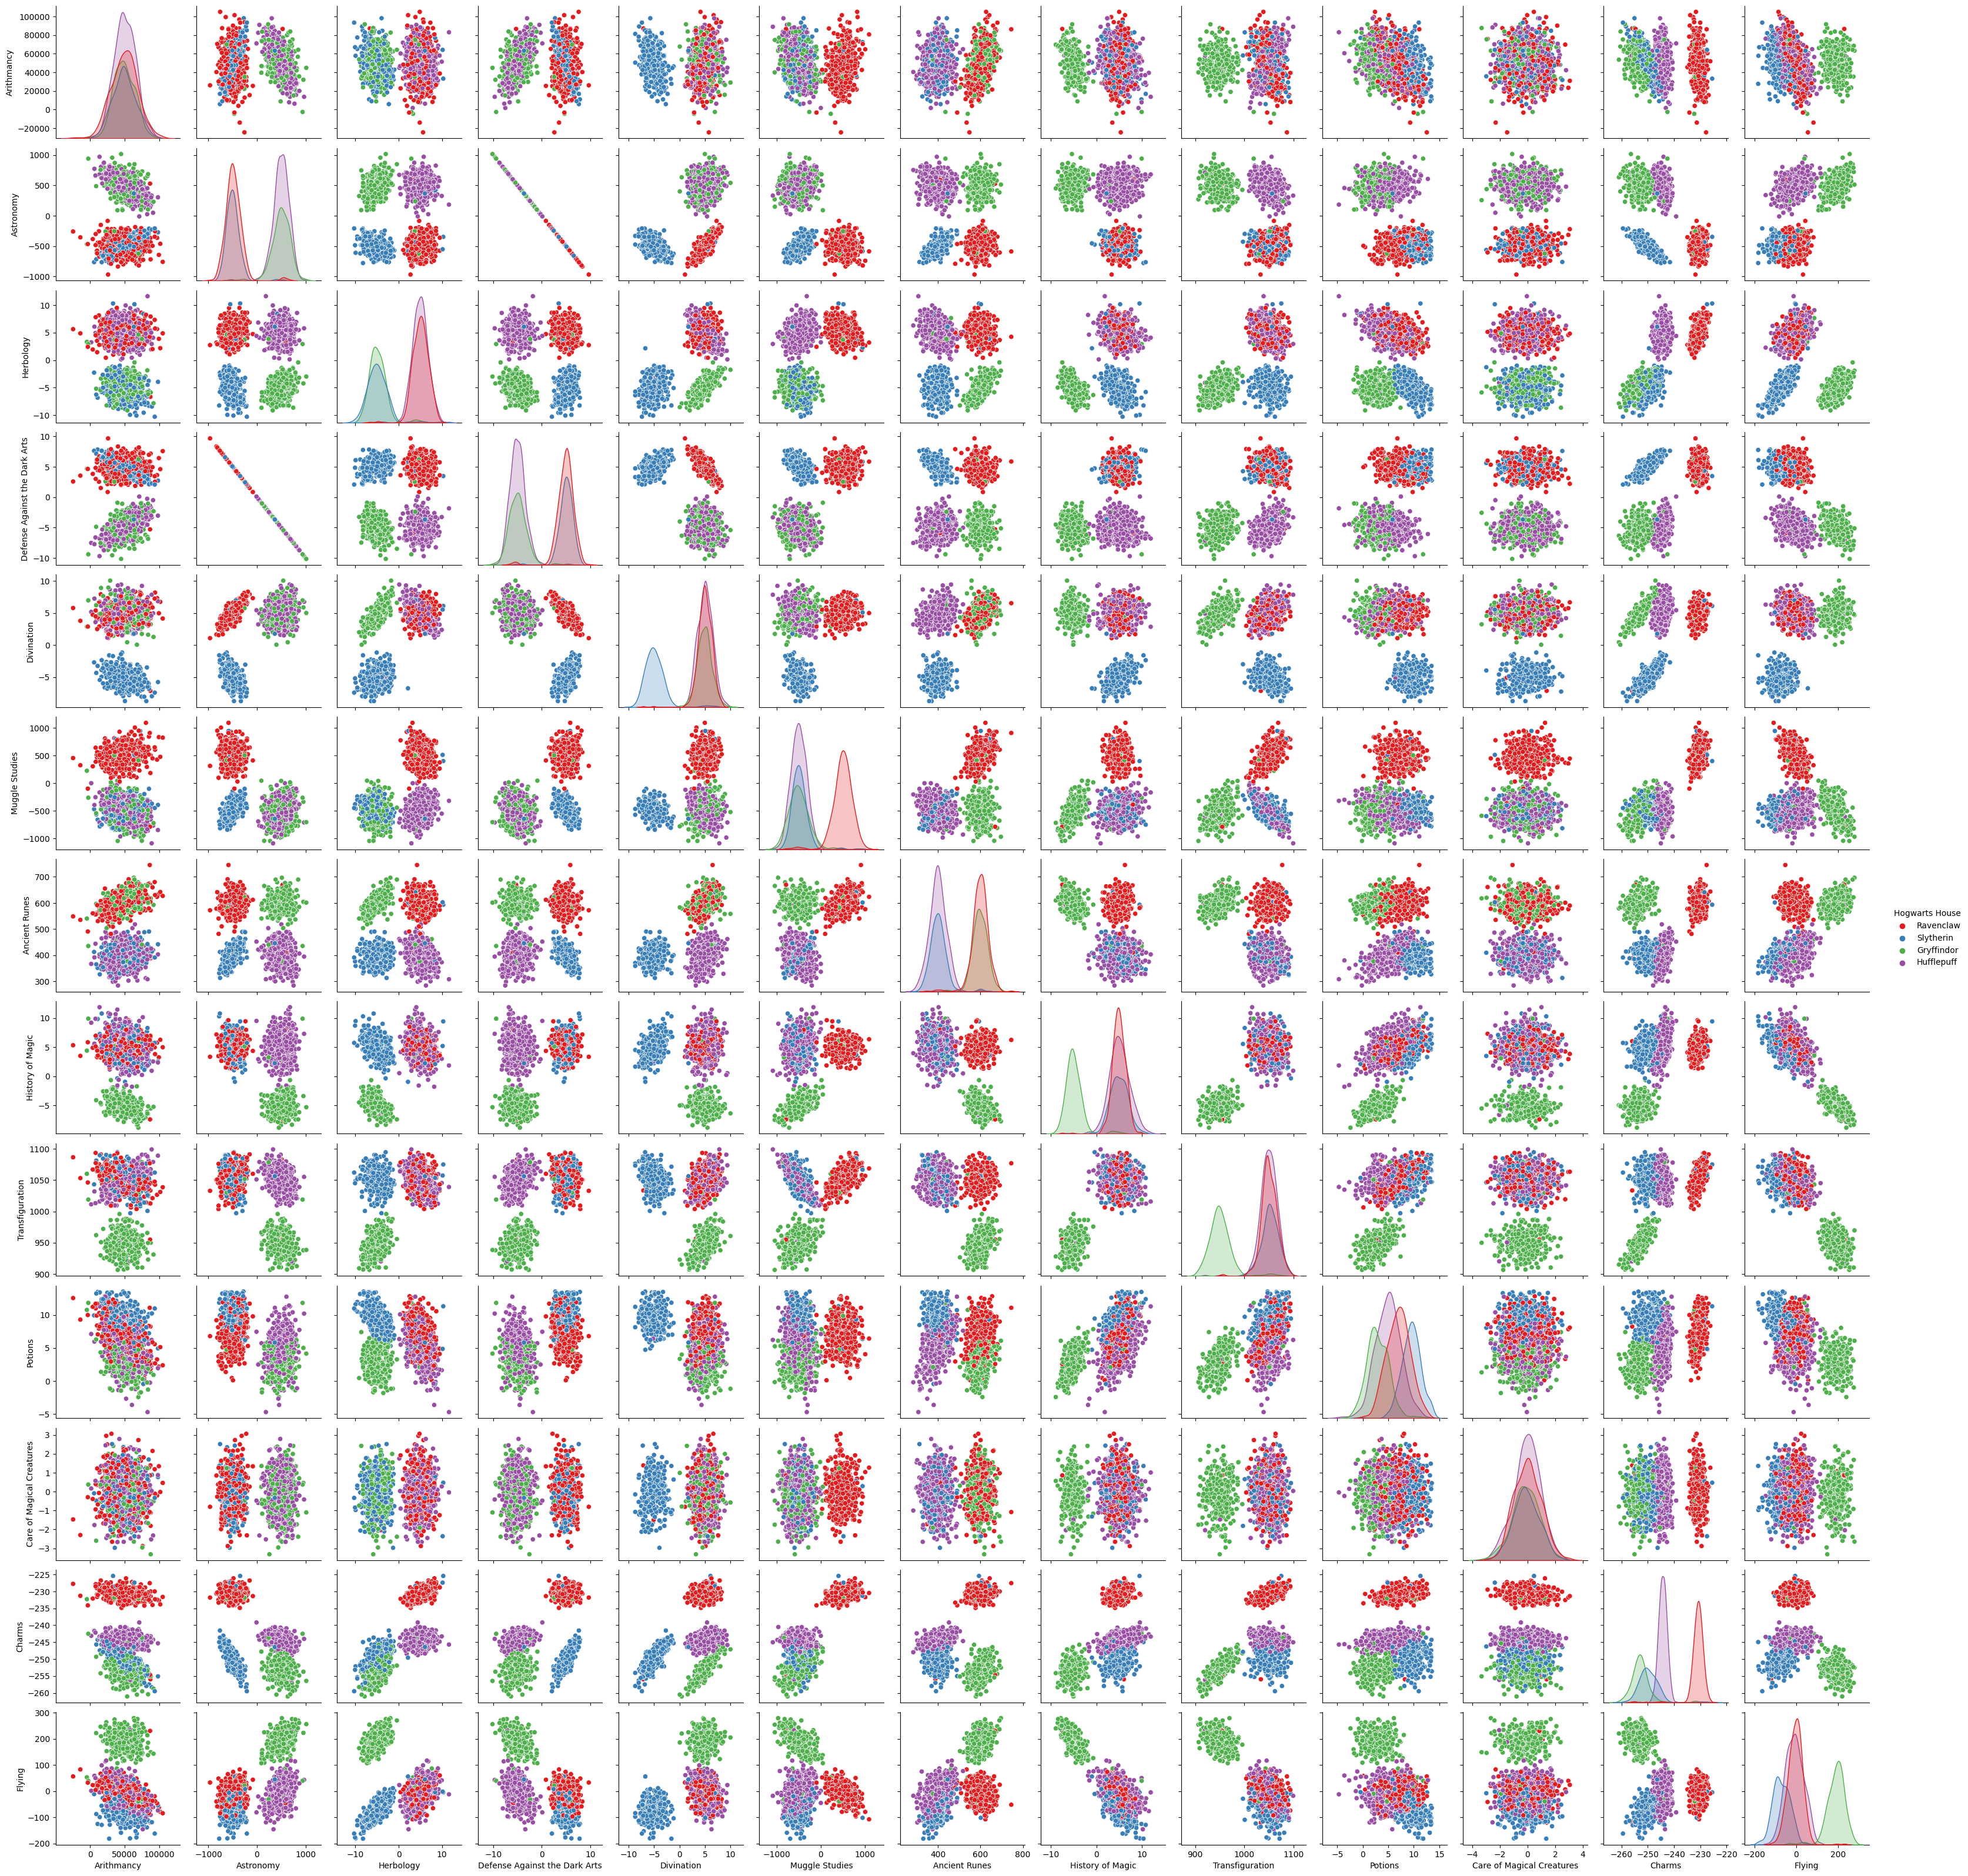

In [10]:
import seaborn as sns
import pandas as pd

# Leer los datos de tu tabla en un DataFrame de Pandas
data = pd.read_csv("datasets/dataset_train.csv")
features =  ['Hogwarts House', 'Arithmancy', 'Astronomy', 'Herbology',
'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
'Care of Magical Creatures', 'Charms', 'Flying']
sns.pairplot(data[features], vars=features[1:], hue='Hogwarts House', palette='Set1')

### Pie Charts left right handed

ValueError: could not broadcast input array from shape (1600,2) into shape (1600,)

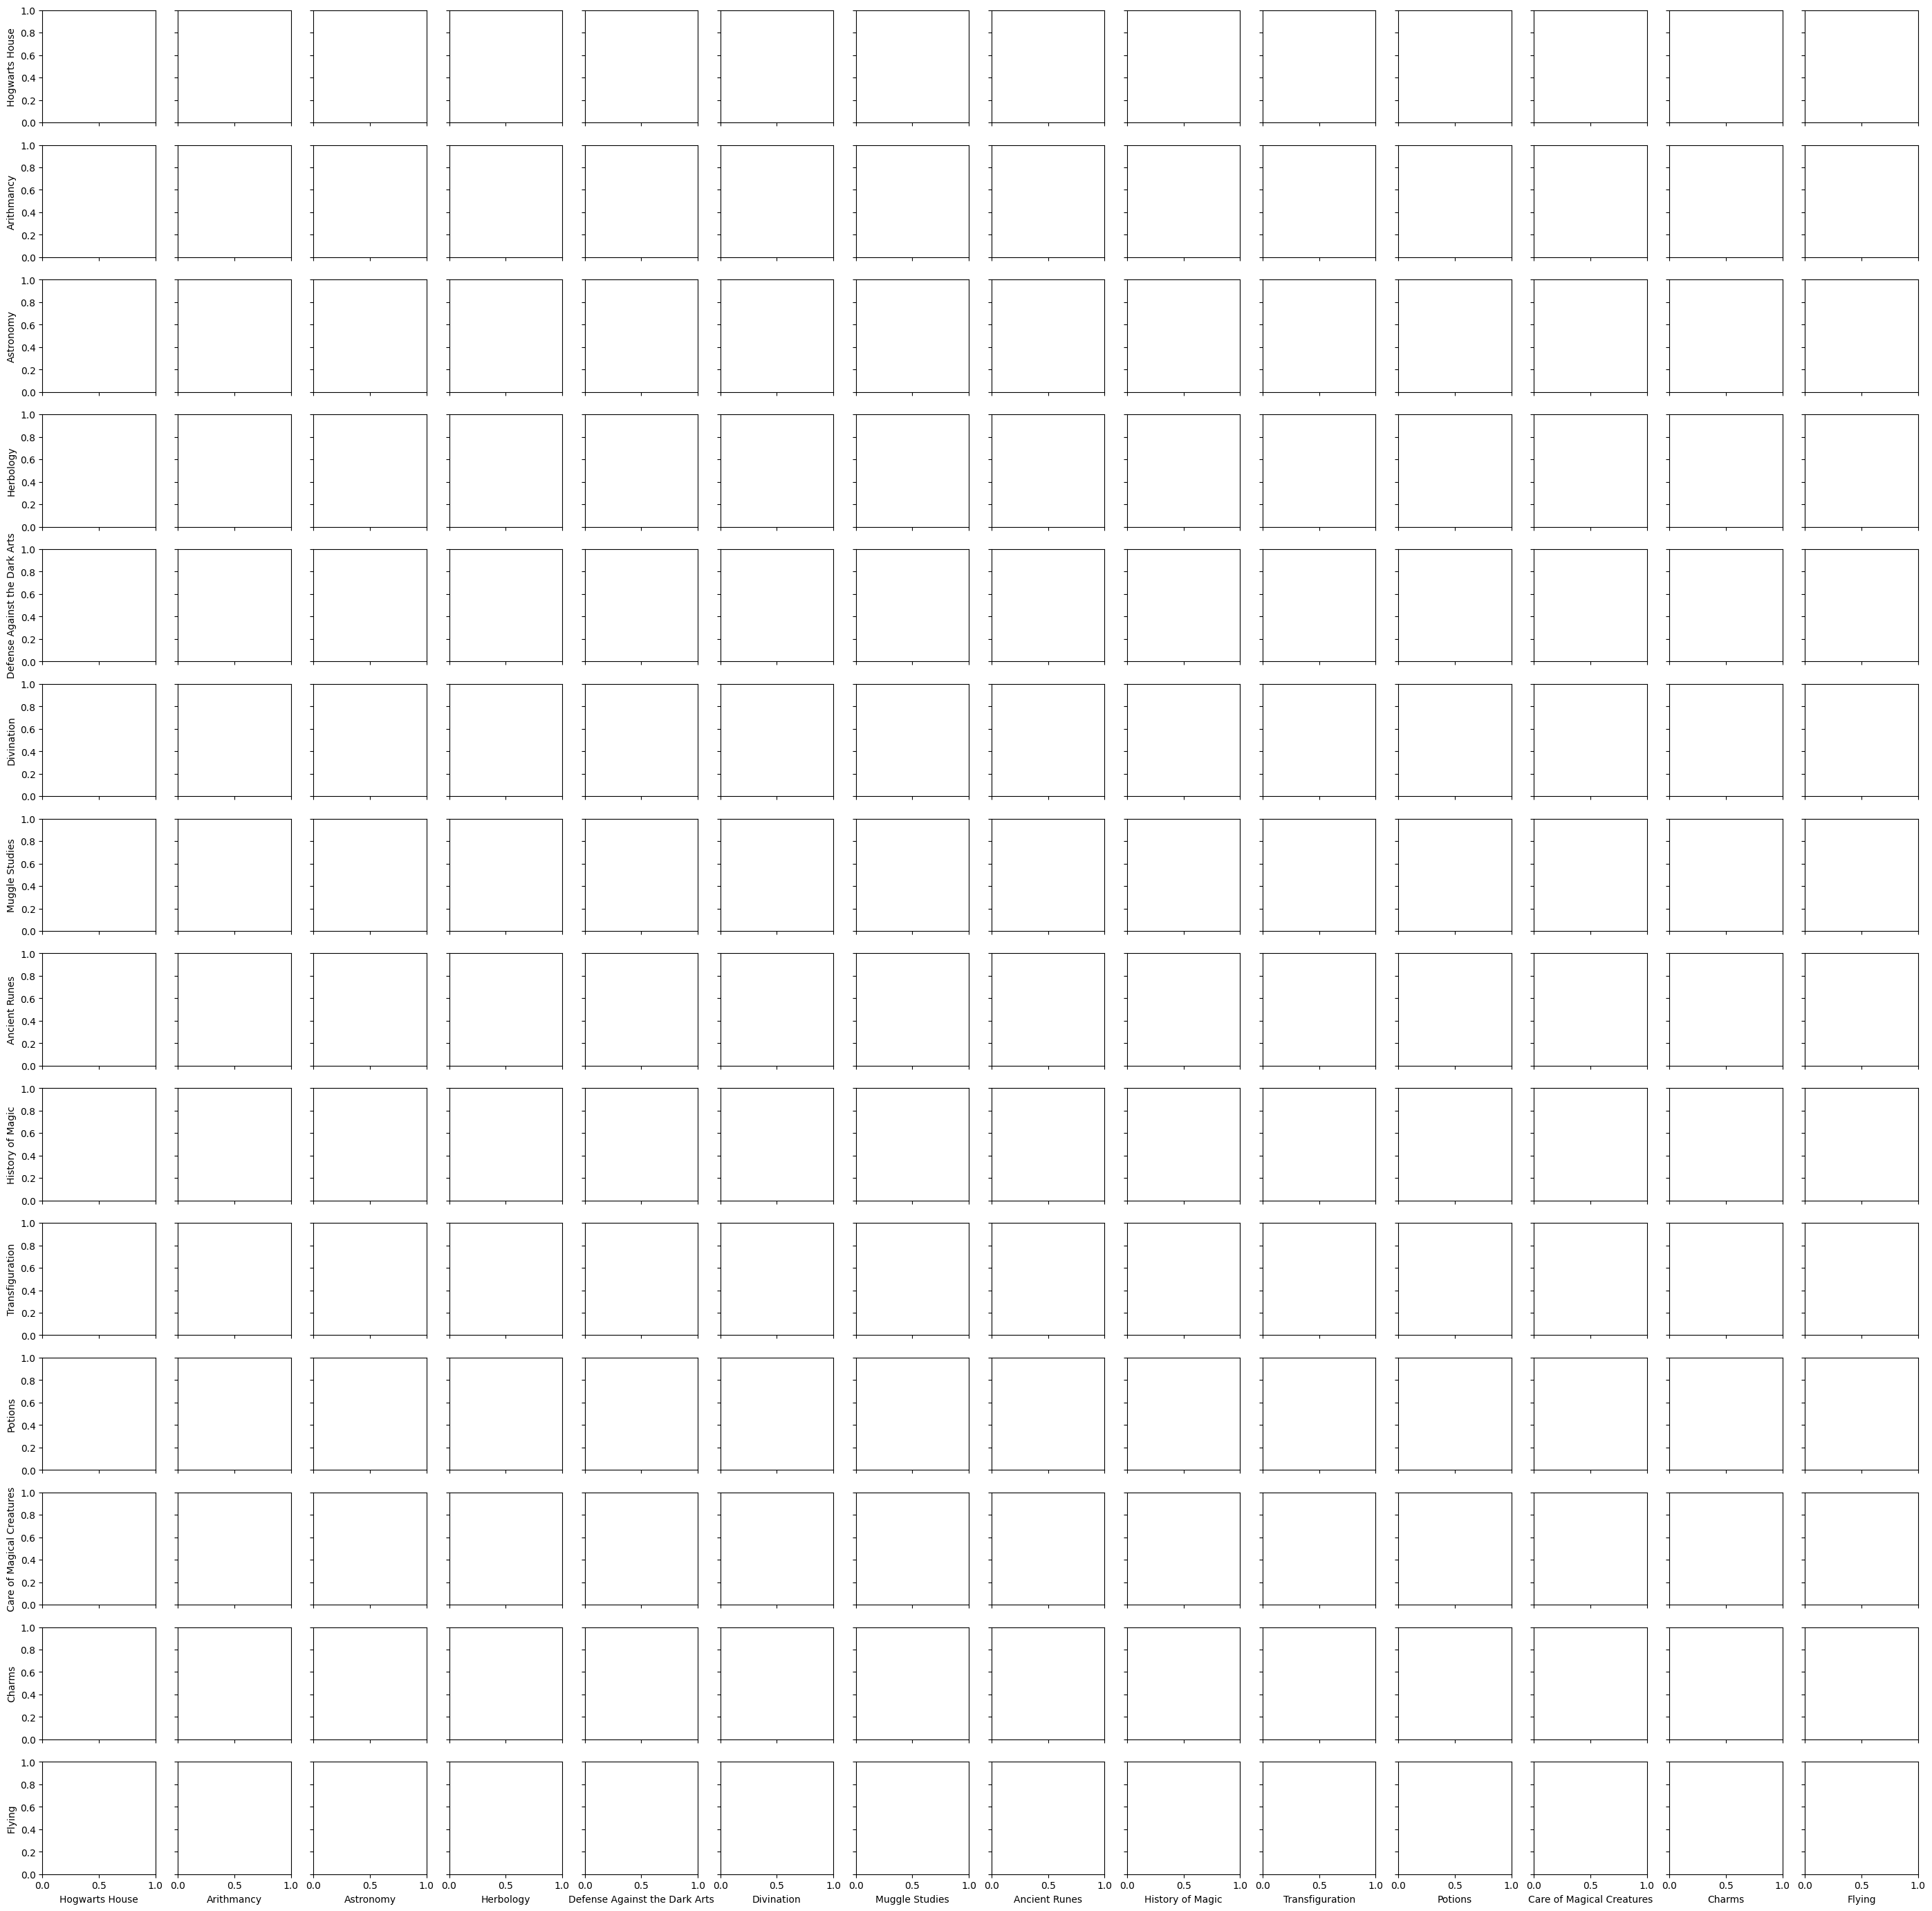

In [12]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import argparse
import seaborn as sns

# Leer los datos de tu tabla en un DataFrame de Pandas
data = pd.read_csv("datasets/dataset_train.csv")
features =  ['Best Hand', 'Hogwarts House', 'Arithmancy', 'Astronomy', 'Herbology',
'Defense Against the Dark Arts', 'Divination', 'Muggle Studies',
'Ancient Runes', 'History of Magic', 'Transfiguration', 'Potions',
'Care of Magical Creatures', 'Charms', 'Flying']
sns.pairplot(data[features], vars=features[1:], hue= ['Best Hand', 'Hogwarts House'], palette='Set1')